In [10]:
#import statements for visualization and data analysis
import pandas as pd
import numpy as np
from pandas import DataFrame as df
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import seaborn as sns
import math

## Initialize Data
Import 'athletes.csv' and store the data in a DataFrame

In [11]:
ath_data = pd.read_csv('athletes.csv', index_col=0)
dobs = ath_data['dob'].values
#calculates the person's age
ages = []
for i in range(dobs.size):
    dob = datetime.strptime((dobs[i]), '%m/%d/%Y')
    age = int((date.today()-dob.date()).days/365)
    ages.append(age)
#appends the list of age to the existing DataFrame
ath_data['age']=ages
#appends the total amount of medals earned from an athlete to the DataFrame
col_list=['gold', 'silver', 'bronze']
ath_data['totals'] = ath_data[col_list].sum(axis=1)

## Density Plot of Age Distribution in Gymnastics and Equestrian

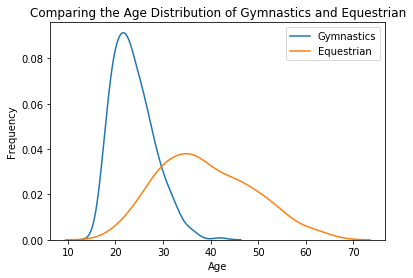

In [12]:
#pulls respective Series of the equestrian/gymnastics athletes of their ages
equestrian = ath_data[ath_data['sport']=='equestrian']
equestrian_data = equestrian[['age']].copy()
gymnastics = ath_data[ath_data['sport']=='gymnastics']
gymnastics_data = gymnastics[['age']].copy()
#density plot of the age distribution
sns.distplot(gymnastics_data, hist=False, label='Gymnastics')
sns.distplot(equestrian_data, hist=False, label='Equestrian')
plt.title("Comparing the Age Distribution of Gymnastics and Equestrian")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Scatter Plot Matrix of Physicals

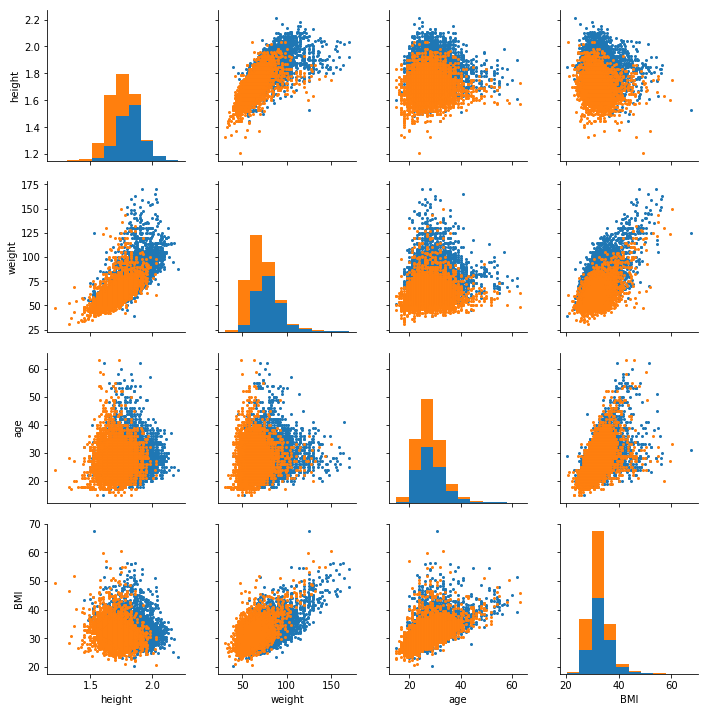

In [13]:
#pulls the height/weight/age/sex of athletes; removes athletes with NaN
#values in any height/weight columns
col_list = ['height', 'weight', 'age', 'sex']
physical=ath_data[col_list]
#physical = pd.DataFrame({'height':ath_data['height'], 'weight':ath_data['weight'],
#    'age':ath_data['age'], 'sex':ath_data['sex']})
physical = physical[physical.height.notnull()]
physical = physical[physical.weight.notnull()]
physical['BMI'] = (physical[col_list].sum(axis=1))/(physical['height'])**2
#plots a scatterplot matrix to observe relationship between features
plot = sns.PairGrid(physical, hue='sex')
plot = plot.map_diag(plt.hist)
plot = plot.map_offdiag(plt.scatter, s = 4)
#sns.pairplot(physical)
plt.show()

## Boxplot of BMI Distribution

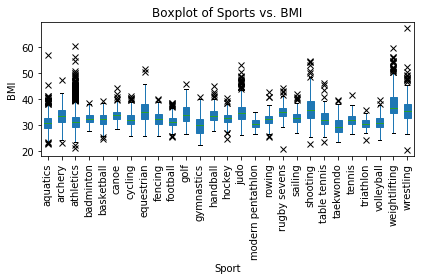

In [14]:
col_list = ['height', 'weight']
physical['sport'] = ath_data['sport']
#plots boxplot of the BMI distribution by sports
plot = physical.boxplot(column = 'BMI', by='sport',  patch_artist=True,
    flierprops=dict(marker='x', color='cyan'))
plot.grid(False)
plot.set_xlabel('Sport')
plot.set_ylabel('BMI')
plt.title("Boxplot of Sports vs. BMI")
plt.suptitle("")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## BMI Distribution of Gymnastics/Aquatics/Weightlifting

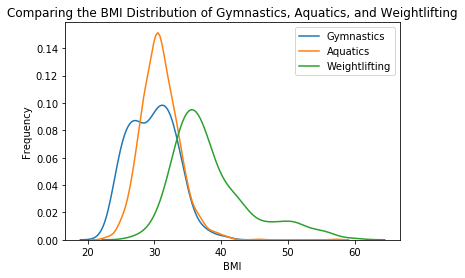

In [15]:
#pulls respective Series of aq/gy/wl athletes of their BMIs
aquatics = physical[physical['sport']=='aquatics']
aquatics_BMI = aquatics[['BMI']].copy()
gymnastics = physical[physical['sport']=='gymnastics']
gymnastics_BMI = gymnastics[['BMI']].copy()
wl = physical[physical['sport']=='weightlifting']
wl_BMI = wl[['BMI']].copy()
#density plot of BMI distribution
sns.distplot(gymnastics_BMI, hist=False, label='Gymnastics')
sns.distplot(aquatics_BMI, hist=False, label='Aquatics')
sns.distplot(wl_BMI, hist=False, label='Weightlifting')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title("Comparing the BMI Distribution of Gymnastics, Aquatics, and Weightlifting")
plt.show()

## Density Plot of Height vs. Weight by Sex

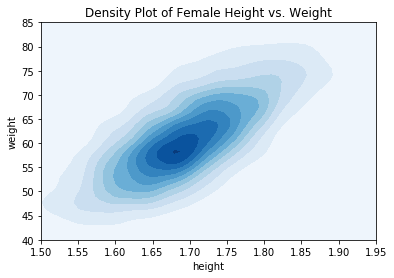

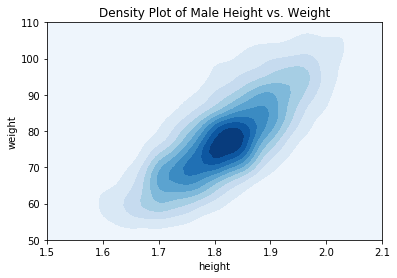

In [16]:
#plots density plot of female/male height vs. weight
physical_f=physical[physical['sex']=='female']
physical_m=physical[physical['sex']=='male']
sns.kdeplot(physical_f.height, physical_f.weight, cmap="Blues", shade=True)
plt.xlim(1.5, 1.95)
plt.ylim(40, 85)
plt.title('Density Plot of Female Height vs. Weight')
plt.show()
sns.kdeplot(physical_m.height, physical_m.weight, cmap="Blues", shade=True)
plt.xlim(1.5, 2.1)
plt.title('Density Plot of Male Height vs. Weight')
plt.ylim(50,110)
plt.show()

## Plots Age Distributions by Sport

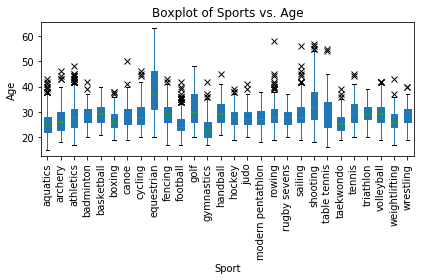

In [17]:
plot = ath_data.boxplot(column='age', by='sport', patch_artist=True,
    flierprops=dict(marker='x', color='cyan'))
plot.grid(False)
plot.set_xlabel('Sport')
plot.set_ylabel('Age')
plt.title("Boxplot of Sports vs. Age")
plt.suptitle("")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Scatter Plot of Height vs. Total Earned Medals

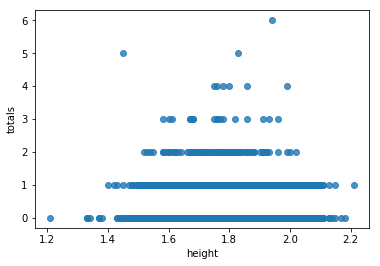

In [18]:
col_list = ['height', 'totals']
height_medals = ath_data[col_list]
height_medals = height_medals[height_medals.height.notnull()]
sns.regplot("height", "totals", data=height_medals, fit_reg=False)
plt.show()